<a href="https://colab.research.google.com/github/gauriagarwal18/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/master/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

##Data Cleaning And Description

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Download datasets 
from google.colab import drive
drive.mount('/content/drive')
import os
path="/content/drive/My Drive/AlmaBetter_Capstone_projects/capstone_project3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"
insurance_original=pd.read_csv(path,parse_dates=[2,3])
insurance= insurance_original.copy()

Mounted at /content/drive


In [3]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


From above we note that:
- in gender we have to do encoding, for male and female
- in vehical age we have to check the number of categories and then we will try to do ordinal encoding
- We will normalize the column of annual premium

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  object 
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 34.9+ MB


- there is no null value in the data
- but we note that some columns are of object type so we will convert it to int to ensure that there is no garbage value

In [5]:
insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
def remove_outliers2(df,continuous_col=[]):

  if len(continuous_col)==0:

   continuous_col=df.describe().columns
  df[continuous_col].boxplot(rot=90)
  plt.title("before removing outliers",)
  plt.show()
  
  for c in continuous_col:
    df.index=np.arange(0,df.shape[0])
    Q1=np.quantile(df[c],0.25)
    Q3=np.quantile(df[c],0.75)
    IQR= Q3 - Q1
    upper=np.where(df[c]>=(Q3+1.5*IQR))[0]
    #print(upper[0])
    lower=np.where(df[c]<=(Q1-1.5*IQR))[0]   #it will be a tuple and we require a numpy array which is at it's first index.
    #print(lower)
    outliers_idx=np.unique(np.append(upper,lower)) 
    df.drop(outliers_idx, inplace = True) 
    
    #df.loc[upper][c]=Q3
    #df.loc[lower][c]=Q1
     
  df[continuous_col].boxplot(rot=90)
  plt.title("after removing outliers",)
  plt.show()
  return df

In [7]:
insurance.shape

(381109, 12)

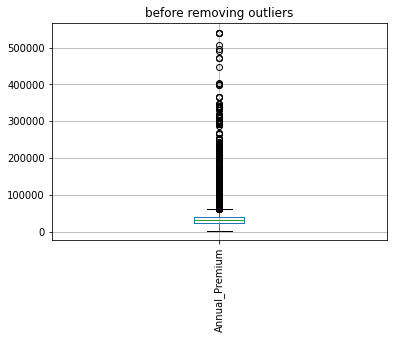

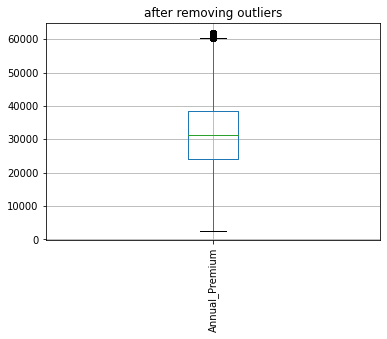

In [8]:
insurance = remove_outliers2(insurance,["Annual_Premium"])

In [9]:
insurance.shape

(370789, 12)

##Feature Engineering

In [ ]:
column_drop=[]  #here we will append all the columns one-by-one which are needed to drop so drop function needs not to be executed again and again

In [40]:
insurance.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Channel_Response'],
      dtype='object')

In [ ]:
#now we note that all the features in our data are numerical
continuous_features=["Annual_Premium","Vintage",'Age']
categorical_features=[ 'Gender', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']

###Encoding Categorical Variables

In [10]:
#changing gender and vehical damage to 0,1:
"""
in gender
0- male
1- female

in Vehical_Damage
0- no
1- yes

"""

'\nin gender\n0- male\n1- female\n\nin Vehical_Damage\n0- no\n1- yes\n\n'

In [11]:
gender_dict={"Male":0,"Female":1}
for c in insurance["Gender"].unique():
  insurance["Gender"][insurance["Gender"]==c]=gender_dict[c]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
damage_dict={"Yes":0,"No":1}
for c in insurance["Vehicle_Damage"].unique():
  insurance["Vehicle_Damage"][insurance["Vehicle_Damage"]==c]=damage_dict[c]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
#now changing vehical age, so checking the  different categories it is having
insurance["Vehicle_Age"].unique()

array([3, 1, 0])

from above we note that vehical age is categorized into three types:
0- age is less than 1 year
1- age is between 1-2 years
2- age is greater than 2 years

so for this feature we will do ordinal encoding 

In [14]:
age_dict={"< 1 Year":0,"1-2 Year":1,"> 2 Years":3}

In [15]:
insurance["Vehicle_Age"]=insurance["Vehicle_Age"].replace(age_dict)

In [17]:
#now all the columns in data are integer columns so changing their dtype
for c in insurance.columns:
  insurance[c]=pd.to_numeric(insurance[c])

In [18]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    370789 non-null  int64  
 1   Gender                370789 non-null  int64  
 2   Age                   370789 non-null  int64  
 3   Driving_License       370789 non-null  int64  
 4   Region_Code           370789 non-null  float64
 5   Previously_Insured    370789 non-null  int64  
 6   Vehicle_Age           370789 non-null  int64  
 7   Vehicle_Damage        370789 non-null  int64  
 8   Annual_Premium        370789 non-null  float64
 9   Policy_Sales_Channel  370789 non-null  float64
 10  Vintage               370789 non-null  int64  
 11  Response              370789 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 36.8 MB


###Feature Engineering on Categorical Data

In [41]:
#counting the number of unique values in each feature
for c in categorical_features:
  print(f"number of unique values in column {c}: {(insurance[c].unique()).size}")

number of unique values in column Gender: 2
number of unique values in column Driving_License: 2
number of unique values in column Region_Code: 53
number of unique values in column Previously_Insured: 2
number of unique values in column Vehicle_Age: 3
number of unique values in column Vehicle_Damage: 2
number of unique values in column Policy_Sales_Channel: 63
number of unique values in column Response: 2


- **id**: the column id is of no use as it is just showing the id of a customer which is unique for every row, so it does'nt effect our result
- Gender: no feature engineering required
- **Region Code**: In this we have to observe some important points to check how this feature is useful.
- Previously_Insured: no feature engineering required
- Vehical_Age: no feature engineering required
- Vehical_Damage: no feature engineering requiredd
- **Policy_sales_channels**: There are total 155 policy sales channels, let's check if there is any particular order or we have to perform some feature engineering
- response: no feature engineering required

In [ ]:
column_drop.append("id")

In [23]:
#value_counts for categorical features

for c in categorical_features:
  print(f"for column {c}:\n{insurance[c].value_counts()}","\n")

for column Gender:
0    200319
1    170470
Name: Gender, dtype: int64 

for column Driving_License:
1    370026
0       763
Name: Driving_License, dtype: int64 

for column Region_Code:
28.0    99741
8.0     32069
46.0    19628
41.0    17941
15.0    13178
30.0    12179
29.0    10871
50.0    10188
3.0      9172
11.0     9116
36.0     8700
33.0     7613
47.0     7418
35.0     6883
6.0      6273
45.0     5571
37.0     5483
18.0     5115
48.0     4681
14.0     4647
39.0     4558
10.0     4364
21.0     4257
2.0      4038
13.0     4029
12.0     3188
7.0      3168
9.0      3094
27.0     2816
32.0     2786
43.0     2616
26.0     2584
17.0     2535
25.0     2491
24.0     2408
0.0      2019
38.0     2006
16.0     2006
31.0     1960
23.0     1958
20.0     1934
49.0     1824
4.0      1796
34.0     1656
19.0     1534
22.0     1298
40.0     1285
5.0      1275
1.0      1008
44.0      805
42.0      590
52.0      262
51.0      174
Name: Region_Code, dtype: int64 

for column Previously_Insured:
0    20

####Feature Engineering on Region_Code column

####Policy Sales Channel
From value counts we observe that there is no particular trend in the column, also some of the channels have very less contribution

In [24]:
#from above in policy sales channel we note that at last channels are very less active channels at beginning are more useful

channels=insurance["Policy_Sales_Channel"].value_counts()
lesser_insurance=channels.index[channels.values<100]

#these all indexes have less than 100 contribution which is very less as compared to higher contributions as be observed from above so let's consider
#these all as 1 channel with index  0.0

to_0=[True if c in lesser_insurance else False for c in insurance["Policy_Sales_Channel"] ]
insurance["Policy_Sales_Channel"][to_0]=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [25]:
insurance["Policy_Sales_Channel"].value_counts()

152.0    132168
26.0      76375
124.0     71902
160.0     21489
156.0     10591
          ...  
127.0       105
113.0       104
119.0       101
135.0       101
54.0        100
Name: Policy_Sales_Channel, Length: 63, dtype: int64

Now we have added a new column named Channel Response which shows the percentage of customers for a given policy channel who takes vehical insurance, as there are so many policy channels and there is no particular order so after adding this useful column we will drop policy channel column

In [26]:
channel_respose=pd.crosstab(insurance["Policy_Sales_Channel"],insurance["Response"])
channel_respose_percentage=channel_respose.copy()
total = channel_respose[0]+channel_respose[1]
channel_respose_percentage[0] = round((channel_respose[0]/total)*100,2)
channel_respose_percentage[1] = round((channel_respose[1]/total)*100,2)
channel_respose_percentage.sort_values(by=1,inplace=True,ascending=False)

In [37]:
Channel_Response_dict=dict(channel_respose_percentage[1])
insurance["Channel_Response"]=insurance["Policy_Sales_Channel"].replace(age_dict)
column_drop.append("Policy_Sales_Channel")
continuous_features.append("Channel_Response")

###Feature Engineering on Continuous Attributes